In [4]:
import sys
import os
from tempfile import mkdtemp

import numpy as np
from process_bigraph import Composite
from process_bigraph.experiments.parameter_scan import RunProcess


sys.path.insert(0, '..')


from biosimulator_processes.processes.amici_process import AmiciUtc
from biosimulator_processes.processes.copasi_process import CopasiUtc

from biosimulator_processes.io import read_report_outputs
from biosimulator_processes.helpers import plot_utc_outputs

In [2]:
omex_dir = './examples/sbml-core/Elowitz-Nature-2000-Repressilator'
omex_fp = omex_dir + '.omex'
sbml_fp = os.path.join(omex_dir, 'BIOMD0000000012_url.xml')
sedml_fp = os.path.join(omex_dir, 'simulation.sedml')
reports_path = os.path.join(omex_dir, 'reports.h5')

Configure and create an Amici UTC instance using just the archive filepath.

In [3]:
utc_amici = AmiciUtc(config={'model': {'model_source': omex_dir + '.omex'}})

FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/yy/8crj8x7x5_3b86f0js6_0bn00000gr/T/tmpuxpo_7u0/./examples/sbml-core/Elowitz-Nature-2000-Repressilator'

In [4]:
# t range parameters set via sedml introspection within archive contents:
utc_amici.t[0], utc_amici.t[-1], utc_amici.duration, utc_amici.step_size, utc_amici.num_steps

(400.0, 600.0, 600, 1.0, 600)

In [5]:
# you can verify this time config against the SEDML file
!cat ./examples/sbml-core/Elowitz-Nature-2000-Repressilator/simulation.sedml

<?xml version="1.0" encoding="UTF-8"?>
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version3" level="1" version="3"
  xmlns:sbml="http://www.sbml.org/sbml/level2/version3">
  <listOfModels>
    <model id="model" language="urn:sedml:language:sbml" source="BIOMD0000000012_url.xml">
      <listOfChanges>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id='PX']/@initialAmount" newValue="0"/>
      </listOfChanges>
    </model>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="simulation" initialTime="0" outputStartTime="400" outputEndTime="1000" numberOfPoints="600">
      <algorithm kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task" modelReference="model" simulationReference="simulation"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="data_gen_time" name="time">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> var_time </ci>
      </ma

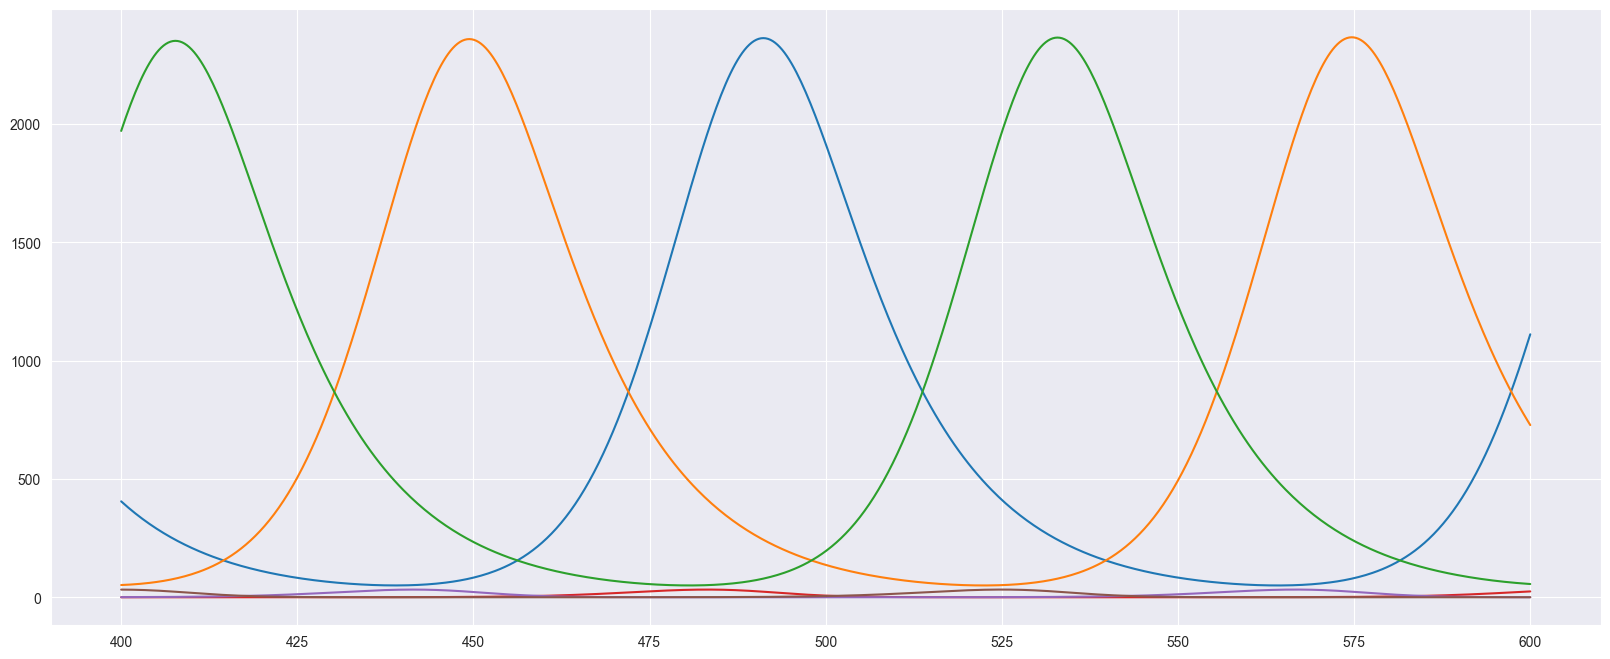

In [8]:
# use built-in plot to plot results
utc_amici.plot_results()

In [9]:
amici_process.t 

array([400.        , 400.33388982, 400.66777963, 401.00166945,
       401.33555927, 401.66944908, 402.0033389 , 402.33722871,
       402.67111853, 403.00500835, 403.33889816, 403.67278798,
       404.0066778 , 404.34056761, 404.67445743, 405.00834725,
       405.34223706, 405.67612688, 406.01001669, 406.34390651,
       406.67779633, 407.01168614, 407.34557596, 407.67946578,
       408.01335559, 408.34724541, 408.68113523, 409.01502504,
       409.34891486, 409.68280467, 410.01669449, 410.35058431,
       410.68447412, 411.01836394, 411.35225376, 411.68614357,
       412.02003339, 412.35392321, 412.68781302, 413.02170284,
       413.35559265, 413.68948247, 414.02337229, 414.3572621 ,
       414.69115192, 415.02504174, 415.35893155, 415.69282137,
       416.02671119, 416.360601  , 416.69449082, 417.02838063,
       417.36227045, 417.69616027, 418.03005008, 418.3639399 ,
       418.69782972, 419.03171953, 419.36560935, 419.69949917,
       420.03338898, 420.3672788 , 420.70116861, 421.03

Finally, optionally generate a "ground truth" which we include in the comparison. The default source for ground-truth data is via uploading an omex archive as model source. The report outputs will be included in the archive.

In [10]:
# Generate comparison matrix from ground truth
from biosimulator_processes.api.compare import generate_comparison

In [11]:
published_results = read_report_outputs(reports_path)

type(published_results)

biosimulator_processes.data_model.service_data_model.BiosimulationsRunOutputData

In [12]:
published_results.data

[BiosimulationsReportOutput(dataset_label='Time', data=array([ 400.,  401.,  402.,  403.,  404.,  405.,  406.,  407.,  408.,
         409.,  410.,  411.,  412.,  413.,  414.,  415.,  416.,  417.,
         418.,  419.,  420.,  421.,  422.,  423.,  424.,  425.,  426.,
         427.,  428.,  429.,  430.,  431.,  432.,  433.,  434.,  435.,
         436.,  437.,  438.,  439.,  440.,  441.,  442.,  443.,  444.,
         445.,  446.,  447.,  448.,  449.,  450.,  451.,  452.,  453.,
         454.,  455.,  456.,  457.,  458.,  459.,  460.,  461.,  462.,
         463.,  464.,  465.,  466.,  467.,  468.,  469.,  470.,  471.,
         472.,  473.,  474.,  475.,  476.,  477.,  478.,  479.,  480.,
         481.,  482.,  483.,  484.,  485.,  486.,  487.,  488.,  489.,
         490.,  491.,  492.,  493.,  494.,  495.,  496.,  497.,  498.,
         499.,  500.,  501.,  502.,  503.,  504.,  505.,  506.,  507.,
         508.,  509.,  510.,  511.,  512.,  513.,  514.,  515.,  516.,
         517.,  518.,  

In [13]:
published_species_outputs = []
for report_output in published_results.data:
    if not report_output.dataset_label.lower() == 'time':
        published_species_outputs.append({report_output.dataset_label: report_output.data})

In [14]:
published_species_outputs

[{'LacI protein': array([ 405.55652983,  379.34614367,  354.84702027,  331.95291683,
          310.56321344,  290.58285165,  271.92221148,  254.49695325,
          238.22782834,  223.0404732 ,  208.86519428,  195.63674871,
          183.29412653,  171.78033735,  161.04220458,  151.03016869,
          141.69810155,  133.00313239,  124.90548688,  117.36833926,
          110.35767863,  103.84218933,   97.79314633,   92.184326  ,
           86.99193258,   82.19454111,   77.77305794,   73.71069919,
           69.99298873,   66.60777672,   63.5452803 ,   60.79814824,
           58.36155136,   56.23330138,   54.41399943,   52.90721951,
           51.71972724,   50.86173903,   50.3472248 ,   50.19425787,
           50.4254164 ,   51.06824025,   52.15574714,   53.72701221,
           55.82781383,   58.51134832,   61.83901449,   65.88126753,
           70.71853851,   76.44221338,   83.15565957,   90.97528359,
          100.03159485,  110.47024147,  122.4529798 ,  136.15850188,
          151.7830